In [1]:
import lightgbm as lgbm

import sklearn as sk
import pandas as pd
import base_functions as funcs
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import imblearn
import sklearn
from sklearn.ensemble  import RandomForestClassifier
import lightgbm as lgbm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler

data, labels = funcs.ReadCSV('./datasets/creditcard.csv', mark='Class')
data = data.drop(columns=['Time'])


In [2]:
split_index=int(len(data)*0.8)

data_train, data_test, labels_train, labels_test = (data.iloc[0:split_index], data.iloc[split_index:],
                                                    labels.iloc[0:split_index], labels.iloc[split_index:])

In [19]:
##оверсемплинг
# Создание экземпляра SMOTE  (ran)
smote = SMOTE(sampling_strategy=0.5,random_state=40)

##ресемплинг до разбиения на выборки
data_res, labels_res = smote.fit_resample(data, labels)
data_train_bf, data_test_bf, labels_train_bf, labels_test_bf = (data_res.iloc[0:split_index], data_res.iloc[split_index:],
                                                    labels_res.iloc[0:split_index], labels_res.iloc[split_index:])

##ресемплинг после  разбиения на выборки 
data_train_af, labels_train_af = smote.fit_resample(data_train,labels_train)

In [30]:
##оверсемплинг
# Создание экземпляра ADASYN
adasyn = ADASYN(sampling_strategy=0.5)

##ресемплинг до разбиения на выборки
data_res, labels_res = adasyn.fit_resample(data, labels)
data_train_bf, data_test_bf, labels_train_bf, labels_test_bf = (data_res.iloc[0:split_index], data_res.iloc[split_index:],
                                                    labels_res.iloc[0:split_index], labels_res.iloc[split_index:])

##ресемплинг после  разбиения на выборки 
data_train_af, labels_train_af = adasyn.fit_resample(data_train,labels_train)

In [20]:
lgbmClassifier_bf = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',
                                     class_weight='balanced',   learning_rate=0.055   )


lgbmClassifier_bf.fit(data_train_bf , labels_train_bf)

lgbmClassifier_af = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',
                                     class_weight='balanced',   learning_rate=0.055   )


lgbmClassifier_af.fit(data_train_af , labels_train_af)

lgbmClassifier = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',
                                     class_weight='balanced',   learning_rate=0.055   )


lgbmClassifier.fit(data_train , labels_train)


predicts_bf= lgbmClassifier_bf.predict_proba(data_test_bf )[:, 1]
predicts_af= lgbmClassifier_af.predict_proba(data_test )[:, 1]
predicts= lgbmClassifier.predict_proba(data_test )[:, 1]

[LightGBM] [Info] Number of positive: 417, number of negative: 227428
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [24]:
LRClassifier_bf = linear_model.LogisticRegression(class_weight='balanced', max_iter=300)


LRClassifier_bf.fit(data_train_bf , labels_train_bf)

LRClassifier_af = linear_model.LogisticRegression(class_weight='balanced', max_iter=300)


LRClassifier_af.fit(data_train_af , labels_train_af)

LRClassifier = linear_model.LogisticRegression(class_weight='balanced', max_iter=300)


LRClassifier.fit(data_train , labels_train)


predicts_bf= LRClassifier_bf.predict_proba(data_test_bf )[:, 1]
predicts_af= LRClassifier_af.predict_proba(data_test )[:, 1]
predicts= LRClassifier.predict_proba(data_test )[:, 1]

C:\Users\bobor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bobor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [26]:
MLPClassifier_bf = MLPClassifier(hidden_layer_sizes=(58),  alpha=0.0001,
                                                              activation='relu',
                                                              early_stopping=True,
                                                              )


MLPClassifier_bf.fit(data_train_bf , labels_train_bf)

MLPClassifier_af = MLPClassifier(hidden_layer_sizes=(58),  alpha=0.0001,
                                                              activation='relu',
                                                              early_stopping=True,
                                                              )


MLPClassifier_af.fit(data_train_af , labels_train_af)

MLPClassifier = MLPClassifier(hidden_layer_sizes=(58),  alpha=0.0001,
                                                              activation='relu',
                                                              early_stopping=True,
                                                              )


MLPClassifier.fit(data_train , labels_train)


predicts_bf= MLPClassifier_bf.predict_proba(data_test_bf )[:, 1]
predicts_af= MLPClassifier_af.predict_proba(data_test )[:, 1]
predicts= MLPClassifier.predict_proba(data_test )[:, 1]

In [ ]:
RFClassifier_bf = RandomForestClassifier(class_weight='balanced', n_estimators=600,
                                                n_jobs=-1,max_depth=9)


RFClassifier_bf.fit(data_train_bf , labels_train_bf)

RFClassifier_af = RandomForestClassifier(class_weight='balanced', n_estimators=600,
                                                n_jobs=-1,max_depth=9)


RFClassifier_af.fit(data_train_af , labels_train_af)

RFClassifier = RandomForestClassifier(class_weight='balanced', n_estimators=600,
                                                n_jobs=-1,max_depth=9)


RFClassifier.fit(data_train , labels_train)


predicts_bf= RFClassifier_bf.predict_proba(data_test_bf )[:, 1]
predicts_af= RFClassifier_af.predict_proba(data_test )[:, 1]
predicts= RFClassifier.predict_proba(data_test )[:, 1]

In [27]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
print('average_precision_score: ' , average_precision_score(labels_test, predicts))
print('roc_auc_score: ' , roc_auc_score(labels_test, predicts))
print('average_precision_score до: ' , average_precision_score(labels_test_bf, predicts_bf))
print('roc_auc_score до:  ' , roc_auc_score(labels_test_bf, predicts_bf))
print('average_precision_score после:' , average_precision_score(labels_test, predicts_af))
print('roc_auc_score после: ' , roc_auc_score(labels_test, predicts_af))

average_precision_score:  0.8109867818573938
roc_auc_score:  0.9890583085766519
average_precision_score до:  0.9988332668379821
roc_auc_score до:   0.996954235472778
average_precision_score после: 0.8180872034767638
roc_auc_score после:  0.9871560579159855


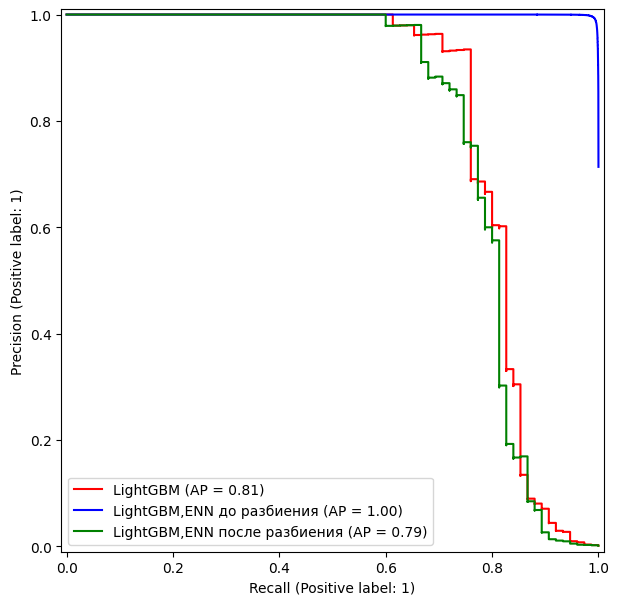

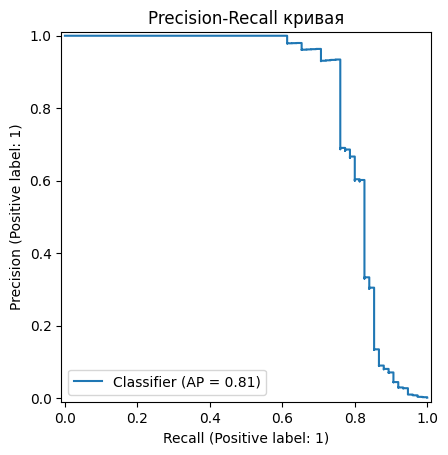

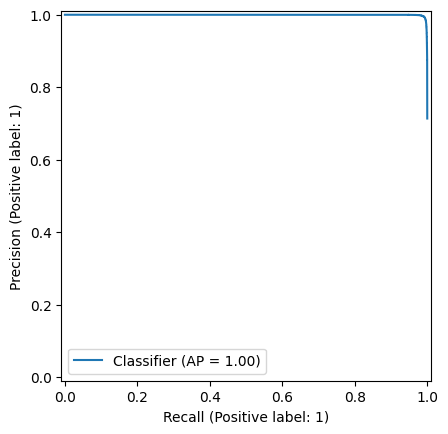

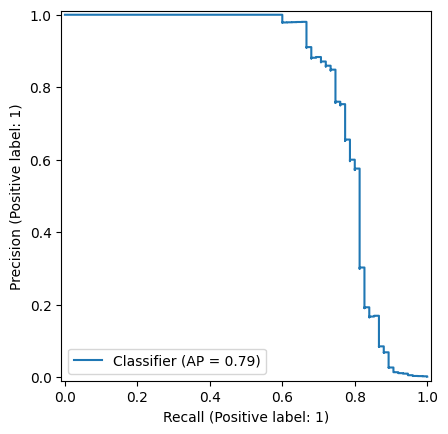

In [23]:
Algorithm_name="LightGBM"  ## RandomForest (RF), MLP, LogisticRegression (LR)

import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay 

#matplotlib.rc('font', **font)

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay.from_predictions(labels_test, predicts)
_ = display.ax_.set_title("Precision-Recall кривая")
display.plot(ax=ax, name=Algorithm_name, color="red")

display = PrecisionRecallDisplay.from_predictions(labels_test_bf, predicts_bf)
display.plot(ax=ax, name=Algorithm_name +",ENN до разбиения", color="blue")

display = PrecisionRecallDisplay.from_predictions(labels_test , predicts_af)
display.plot(ax=ax, name=Algorithm_name+",ENN после разбиения", color='green')

In [30]:
##андерсемплинг
##выбираем классификатор
Classifier = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',
                                     class_weight='balanced',   learning_rate=0.055   )
'''
Classifier = RandomForestClassifier(class_weight='balanced', n_estimators=600, n_jobs=-1,max_depth=9)
Classifier =  LogisticRegression(class_weight='balanced' , max_iter=300)
Classifier = MLPClassifier(hidden_layer_sizes=(58),  alpha=0.0001,
                                                              activation='relu',
                                                              early_stopping=True,
                                                              )
Classifier = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',
                                     class_weight='balanced',   learning_rate=0.055   )
'''

"\nClassifier = RandomForestClassifier(class_weight='balanced', n_estimators=600, n_jobs=-1,max_depth=9)\nClassifier =  LogisticRegression(class_weight='balanced' , max_iter=300)\nClassifier = MLPClassifier(hidden_layer_sizes=(58),  alpha=0.0001,\n                                                              activation='relu',\n                                                              early_stopping=True,\n                                                              )\nClassifier = lgbm.LGBMClassifier(objective='binary', n_estimators=600, metric='prc',\n                                     class_weight='balanced',   learning_rate=0.055   )\n"

In [31]:
##андерсемплинг
tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1)
ENN = EditedNearestNeighbours(sampling_strategy='majority', n_jobs=-1)
rus =  RandomUnderSampler(sampling_strategy=0.01 ,random_state=42)
# Применение tomek к данным
data_train1, labels_train1 = ENN.fit_resample(data_train, labels_train)
Classifier.fit(data_train1 , labels_train1)
predictsTOMEKafter= Classifier.predict_proba(data_test )[:, 1]
# Применение tomek к данным
data_train2, labels_train2 = smote.fit_resample(data_train, labels_train)
Classifier.fit(data_train2 , labels_train2)
predictsENNafter= Classifier.predict_proba(data_test )[:, 1]
# Применение RUS к данным
data_train3, labels_train3 = rus.fit_resample(data_train, labels_train)
Classifier.fit(data_train3 , labels_train3)
predictsRUSafter= Classifier.predict_proba(data_test )[:, 1]

[LightGBM] [Info] Number of positive: 417, number of negative: 227292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227709, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [33]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
print('average_precision_score: ' , average_precision_score(labels_test, predicts))
print('roc_auc_score: ' , roc_auc_score(labels_test, predicts))
print('average_precision_score RUS: ' , average_precision_score(labels_test, predictsRUSafter))
print('roc_auc_score RUS: ' , roc_auc_score(labels_test, predictsRUSafter))
print('average_precision_score TOMEK:' , average_precision_score(labels_test, predictsTOMEKafter))
print('roc_auc_score TOMEK: ' , roc_auc_score(labels_test, predictsTOMEKafter))
print('average_precision_score ENN:' , average_precision_score(labels_test, predictsENNafter))
print('roc_auc_score ENN: ' , roc_auc_score(labels_test, predictsENNafter))


average_precision_score:  0.8109867818573938
roc_auc_score:  0.9890583085766519
average_precision_score RUS:  0.8088638673648298
roc_auc_score RUS:  0.9855760835809002
average_precision_score TOMEK: 0.8132565228380145
roc_auc_score TOMEK:  0.9815205582997873
average_precision_score ENN: 0.7940650102059869
roc_auc_score ENN:  0.971396159638113


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

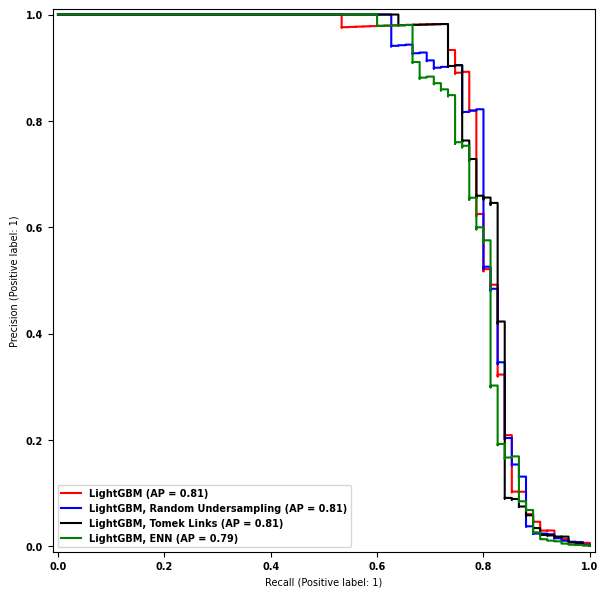

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

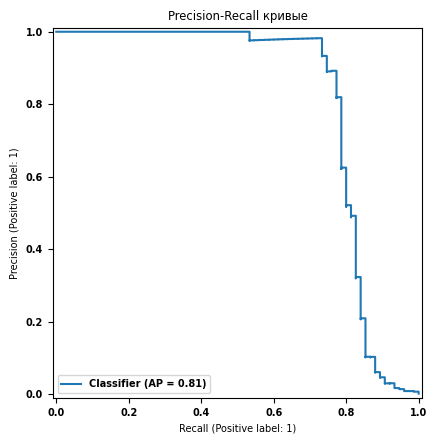

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

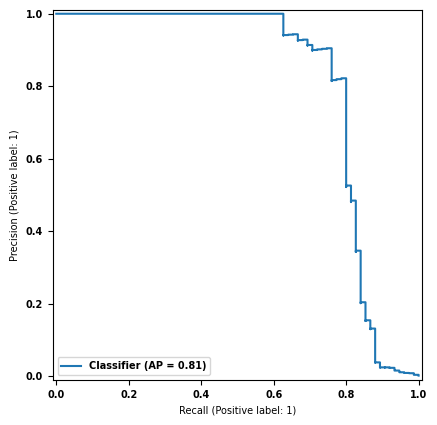

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

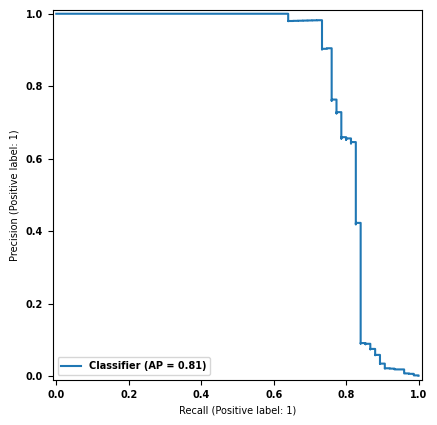

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

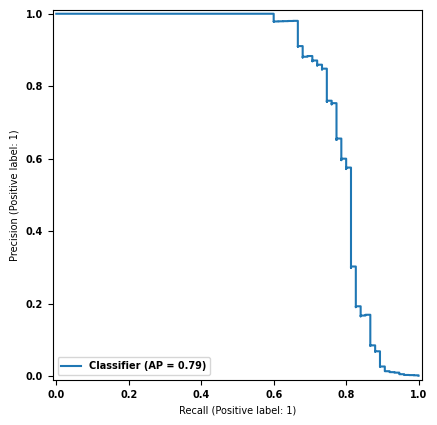

In [34]:
Algorithm_name="LightGBM"  ## RandomForest (RF), MLP, LogisticRegression (LR)


import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

matplotlib.rc('font', **font)

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay.from_predictions(labels_test, predicts)
_ = display.ax_.set_title("Precision-Recall кривые")
display.plot(ax=ax, name=Algorithm_name, color="red")

display = PrecisionRecallDisplay.from_predictions(labels_test, predictsRUSafter)
display.plot(ax=ax, name=Algorithm_name+", Random Undersampling", color="blue")

display = PrecisionRecallDisplay.from_predictions(labels_test, predictsTOMEKafter)
display.plot(ax=ax, name=Algorithm_name+", Tomek Links", color="black")

display = PrecisionRecallDisplay.from_predictions(labels_test, predictsENNafter)
display.plot(ax=ax, name=Algorithm_name+", ENN", color='green')